In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
import json
from pathlib import Path

In [2]:
def load_json(dir):
    try:
        with open(dir) as f:
            data = json.load(f)
            
        return data
    
    except:
        return None

In [9]:
RESULT_DIR = "..\\result_summary"

In [86]:
def parse_file_nm(file_nm):
    mcts_info = None
    
    components = file_nm.split("\\")
    method = components[2]
    
    if method == 'am':
        _, _, method, _, prob_type, num_probs, model_info, baseline_info, _ = components
        
    elif method == 'mcts':
        _, _, method, _, prob_type, num_probs, model_info, baseline_info, mcts_info, _ = components

    # print(model_info)
    
    num_probs = num_probs.split("-")[0]
    num_probs = int(num_probs.split("_")[1])
    baseline_info = baseline_info.split("-")[-1]
    
    return method, prob_type, num_probs, model_info, baseline_info, mcts_info

In [88]:
# parse all json file named with "all_result_avg.json" from the RESULT_DIR

all_result = {}

for file in glob.glob(f"{RESULT_DIR}/**/all_result_avg.json", recursive=True):
    data = load_json(file)
    method, prob_type, num_probs, model_info, baseline_info, mcts_info = parse_file_nm(file)
    
    if data is not None:
        
        if method not in all_result:
            all_result[method] = {}
        
        if prob_type not in all_result[method]:
            all_result[method][prob_type] = {}
            
        if num_probs not in all_result[method][prob_type]:
            all_result[method][prob_type][num_probs] = {}
        
        if mcts_info is None:
            if model_info not in all_result[method][prob_type][num_probs]:
                all_result[method][prob_type][num_probs][model_info] = {}
            
            if baseline_info not in all_result[method][prob_type][num_probs][model_info]:
                all_result[method][prob_type][num_probs][model_info][baseline_info] = data
                
        else:
            if model_info not in all_result[method][prob_type][num_probs]:
                all_result[method][prob_type][num_probs][model_info] = {}
                
            if baseline_info not in all_result[method][prob_type][num_probs][model_info]:
                all_result[method][prob_type][num_probs][model_info][baseline_info] = {}
                
            if mcts_info not in all_result[method][prob_type][num_probs][model_info][baseline_info]:
                all_result[method][prob_type][num_probs][model_info][baseline_info][mcts_info] = data 
                
    # break

['..', 'result_summary', 'mcts', 'pretrained_result', 'cvrp', 'N_100-B_64', 'shared_mha-128-6-32-4-swiglu-10-0.0001', '1562-1-mean', 'ns_50-temp_5-cpuct_0.8-norm_True-rollout_False-ec_0.0100', 'all_result_avg.json']
['..', 'result_summary', 'mcts', 'pretrained_result', 'cvrp', 'N_100-B_64', 'shared_mha-128-6-32-4-swiglu-10-0.0001', '1562-1-mean', 'ns_50-temp_5-cpuct_1.0-norm_True-rollout_False-ec_0.0100', 'all_result_avg.json']
['..', 'result_summary', 'mcts', 'pretrained_result', 'cvrp', 'N_100-B_64', 'shared_mha-128-6-32-4-swiglu-10-0.0001', '1562-1-mean', 'ns_50-temp_5-cpuct_1.1-norm_True-rollout_False-ec_0.0100', 'all_result_avg.json']
['..', 'result_summary', 'mcts', 'pretrained_result', 'cvrp', 'N_100-B_64', 'shared_mha-128-6-32-4-swiglu-10-0.0001', '1562-1-mean', 'ns_50-temp_5-cpuct_1.2-norm_True-rollout_False-ec_0.0100', 'all_result_avg.json']
['..', 'result_summary', 'mcts', 'pretrained_result', 'cvrp', 'N_100-B_64', 'shared_mha-128-6-32-4-swiglu-10-0.0001', '1562-1-mean', 'ns

In [89]:
print(load_json(file))

{'epoch=141-train_score=5.64330': {'result_avg': {'score': 5.740724892616272, 'runtime': 11.488109617233276}, 'result_std': {'score': 0.06606431513339292, 'runtime': 0.014099081542022168}}, 'epoch=195-train_score=5.66837': {'result_avg': {'score': 5.736085977554321, 'runtime': 11.518107554912568}, 'result_std': {'score': 0.06800920331174154, 'runtime': 0.026862965947618823}}, 'epoch=113-train_score=5.65355': {'result_avg': {'score': 5.754173407554626, 'runtime': 11.4972665309906}, 'result_std': {'score': 0.07116751372479876, 'runtime': 0.019823777531229325}}, 'epoch=131-train_score=5.66280': {'result_avg': {'score': 5.754160656929016, 'runtime': 11.508691184520721}, 'result_std': {'score': 0.07276089054286994, 'runtime': 0.01719235905123748}}, 'epoch=147-train_score=5.67667': {'result_avg': {'score': 5.74146014213562, 'runtime': 11.501710226535797}, 'result_std': {'score': 0.08312324985935347, 'runtime': 0.02790232622422912}}}


In [90]:
all_result['am']

{'cvrp': {100: {'shared_mha-128-6-32-4-swiglu-10-0.0001': {'mean': {'epoch=13-train_score=17.13534': {'result_avg': {'score': 18.223267488479614,
       'runtime': 0.6627000284194946},
      'result_std': {'score': 5.043950324651616,
       'runtime': 0.0008557931802247142}},
     'epoch=15-train_score=17.48128': {'result_avg': {'score': 17.793390655517577,
       'runtime': 0.657450065612793},
      'result_std': {'score': 4.412754686509654,
       'runtime': 0.0013426034389730373}},
     'epoch=9-train_score=17.83665': {'result_avg': {'score': 18.872547121047972,
       'runtime': 0.654080069065094},
      'result_std': {'score': 4.460080628222285,
       'runtime': 0.0010960859689616597}},
     'epoch=11-train_score=17.63382': {'result_avg': {'score': 18.42660858154297,
       'runtime': 0.6539999175071717},
      'result_std': {'score': 5.4266285519438755,
       'runtime': 0.001133405071047326}},
     'epoch=3-train_score=18.35944': {'result_avg': {'score': 19.564888887405395,
   

In [251]:
def get_parital_result(method, prob_type, num_prob, leave_only_puct=False):       
    partial_result = {'model_info': [], 'baseline': [], 'mcts_info': [], 'epoch': [], 'score': [], 'runtime': [], 'score_std': []}
    
    def _append_epoch_result(model_info, baseline_info, epoch, mcts, epoch_score, epoch_score_std, epoch_runtime):
        partial_result['model_info'].append(model_info)
        partial_result['baseline'].append(baseline_info)
        partial_result['mcts_info'].append(mcts)
        partial_result['epoch'].append(epoch)                
        partial_result['score'].append(epoch_score)
        partial_result['score_std'].append(epoch_score_std)
        partial_result['runtime'].append(epoch_runtime)
        

    target_result = all_result[method][prob_type][num_prob]
    
    if method == 'am':
        for model_info in target_result:
            for baseline_info in target_result[model_info]:
                all_epoch_results = target_result[model_info][baseline_info]
                
                for epoch in all_epoch_results:
                    current_epoch_result = all_epoch_results[epoch]['result_avg']
                    epoch_score = current_epoch_result['score']
                    epoch_score_std = all_epoch_results[epoch]['result_std']['score']
                    epoch_runtime = current_epoch_result['runtime']
                    
                    _append_epoch_result(model_info, baseline_info, epoch, "am", epoch_score,epoch_score_std, epoch_runtime)
                    
    elif method == 'mcts':
        for model_info in target_result:
            for baseline_info in target_result[model_info]:
                all_mcts_results = target_result[model_info][baseline_info]
                
                for mcts_info in all_mcts_results:
                    all_epoch_results = all_mcts_results[mcts_info]
                    
                    for epoch in all_epoch_results:
                        current_epoch_result = all_epoch_results[epoch]['result_avg']
                        epoch_score = current_epoch_result['score']
                        epoch_score_std = all_epoch_results[epoch]['result_std']['score']
                        epoch_runtime = current_epoch_result['runtime']
                        
                        _append_epoch_result(model_info, baseline_info, epoch, mcts_info, epoch_score,epoch_score_std, epoch_runtime)                                         
            
    df = pd.DataFrame.from_dict(partial_result)
    df['activation'] = df['model_info'].apply(lambda x: x.split("-")[5])
    df = df.drop(columns=['model_info'])
    
    df['train_score'] = df.apply(lambda x: x['epoch'].split("-")[1].split("=")[1], axis=1).astype(float)
    df['epoch'] =  df.apply(lambda x: x['epoch'].split("-")[0].split("=")[1], axis=1).astype(int)
    
    if method == 'mcts' and leave_only_puct:
        df['mcts_info'] = df['mcts_info'].apply(lambda x: x.split("-")[2].split('_')[1])
    
    return df

In [252]:
am_tsp_20 = get_parital_result('am', 'tsp', 20)
am_tsp_20

,baseline,mcts_info,epoch,score,runtime,score_std,activation,train_score
0,mean,am,13,3.886949,0.09524,0.098306,relu,3.75413
1,mean,am,165,3.849429,0.09586,0.084770,relu,3.76186
2,mean,am,23,3.872111,0.09591,0.091890,relu,3.76809
3,mean,am,137,3.853610,0.09653,0.087185,relu,3.76633
4,mean,am,79,3.858670,0.09509,0.086744,relu,3.76020
5,val,am,123,3.852244,0.09476,0.086072,relu,3.75618
6,val,am,119,3.852379,0.09505,0.085081,relu,3.76525
7,val,am,157,3.852983,0.09526,0.084102,relu,3.76857
8,val,am,61,3.866289,0.09485,0.088960,relu,3.76893
9,val,am,113,3.852227,0.09270,0.084670,relu,3.77460


In [253]:
mcts_tsp_20 = get_parital_result('mcts', 'tsp', 20, leave_only_puct=True)
mcts_tsp_20

,baseline,mcts_info,epoch,score,runtime,score_std,activation,train_score
0,mean,0.8,13,3.905120,0.778130,0.101256,relu,3.75413
1,mean,0.8,79,3.870773,0.777085,0.090574,relu,3.76020
2,mean,0.8,137,3.864253,0.781810,0.094417,relu,3.76633
3,mean,0.8,165,3.864734,0.783531,0.088211,relu,3.76186
4,mean,0.8,23,3.875979,0.784630,0.089753,relu,3.76809
...,...,...,...,...,...,...,...,...
115,val,2,105,3.855870,0.795655,0.089854,swiglu,3.75984
116,val,2,85,3.853290,0.798068,0.085959,swiglu,3.77306
117,val,2,193,3.853663,0.796264,0.086140,swiglu,3.77567
118,val,2,113,3.850458,0.796710,0.086171,swiglu,3.78154


In [254]:
all_tsp_20 = pd.concat([am_tsp_20, mcts_tsp_20])
all_tsp_20

,baseline,mcts_info,epoch,score,runtime,score_std,activation,train_score
0,mean,am,13,3.886949,0.095240,0.098306,relu,3.75413
1,mean,am,165,3.849429,0.095860,0.084770,relu,3.76186
2,mean,am,23,3.872111,0.095910,0.091890,relu,3.76809
3,mean,am,137,3.853610,0.096530,0.087185,relu,3.76633
4,mean,am,79,3.858670,0.095090,0.086744,relu,3.76020
...,...,...,...,...,...,...,...,...
115,val,2,105,3.855870,0.795655,0.089854,swiglu,3.75984
116,val,2,85,3.853290,0.798068,0.085959,swiglu,3.77306
117,val,2,193,3.853663,0.796264,0.086140,swiglu,3.77567
118,val,2,113,3.850458,0.796710,0.086171,swiglu,3.78154


In [395]:
def plot_bar_result(base_df, baseline, activation, prob_type, num_prob, plot_dev=False):
    y_ranges = {20: (3.75, 3.95), 50: (5.7, 5.875), 100: (7.95, 8.25)}
        
    _df = base_df[(base_df['baseline'] == baseline) & (base_df['activation'] == activation)]
    
    # drop rows where the mcts_info is 0.8
    _df = _df[_df['mcts_info'] != '0.8']
    
    # sort by the train score
    _df = _df.sort_values(by=['epoch', 'mcts_info']).reset_index(drop=True)
    
    plt.figure(figsize=(12, 7))
    
    ax = sns.barplot(data=_df, x=_df['epoch'], y='score', hue='mcts_info')    
    
    if plot_dev:
        bar_coords = [(rect.get_x(), rect.get_y(), rect.get_width(), rect.get_height()) for rect in ax.patches]
                
        for i, (x, y, w, h) in enumerate(bar_coords):
            x_pos = x + w / 2
            y_top = y + h + 0.01
            
            plt.errorbar(x=x_pos, y=y_top, yerr=_df['score_std'][i], fmt='none', color='black', capsize=4)
    
    plt.title(f"{prob_type}_{num_prob}_{baseline}_{activation}")
    plt.ylim(*y_ranges[num_prob])
    plt.legend()
    
    path = Path(f"../result_image/bars")
    
    if not path.exists():
        path.mkdir(parents=True)
        
    
    plt.savefig(f"{path}/{prob_type}_{num_prob}_{baseline}_{activation}.png")
    plt.show()

In [396]:
# for _baseline in ['mean', 'val']:
#     for _activation in ['relu', 'swiglu']:
#         plot_bar_result(all_tsp_20, _baseline, _activation, 'tsp', 20)

In [397]:
# tsp_50 = pd.concat([get_parital_result('am', 'tsp', 50), get_parital_result('mcts', 'tsp', 50, leave_only_puct=True)])

# for _baseline in ['mean', 'val']:
#     for _activation in ['relu', 'swiglu']:
#         plot_bar_result(tsp_50, _baseline, _activation, 'tsp', 50)

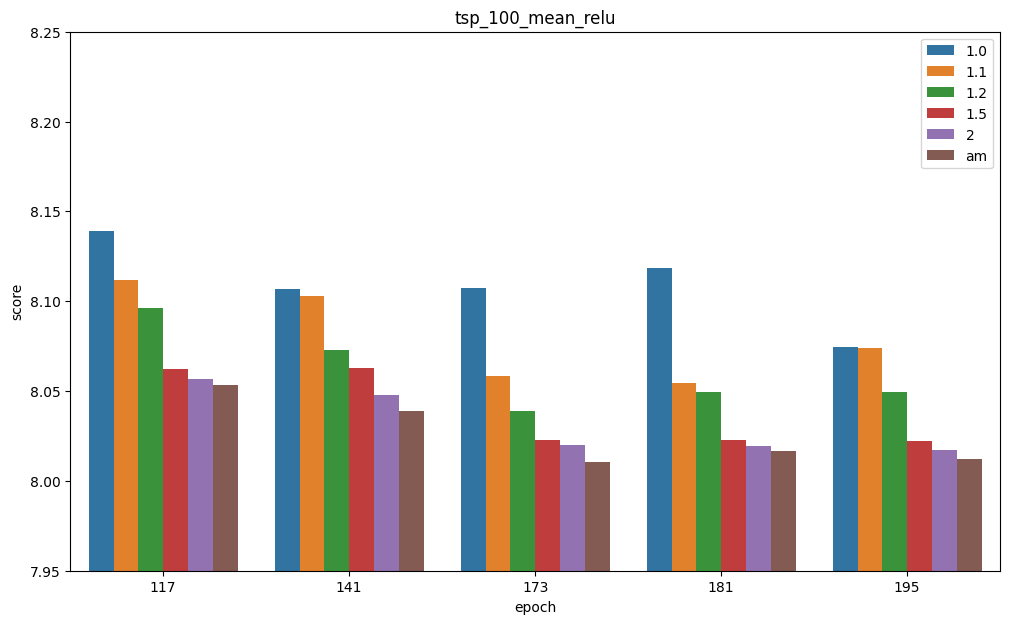

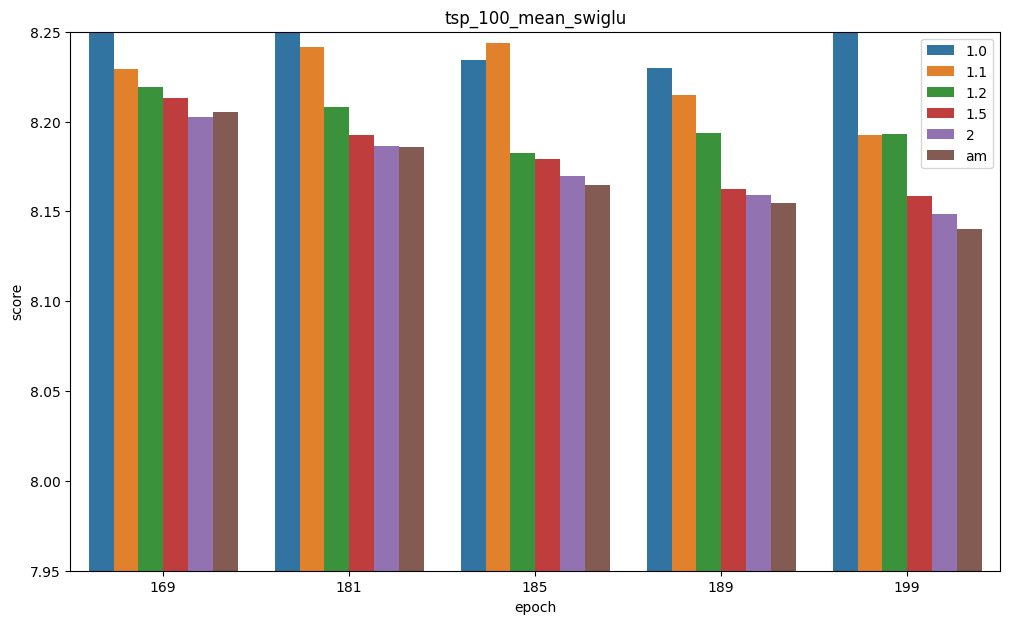

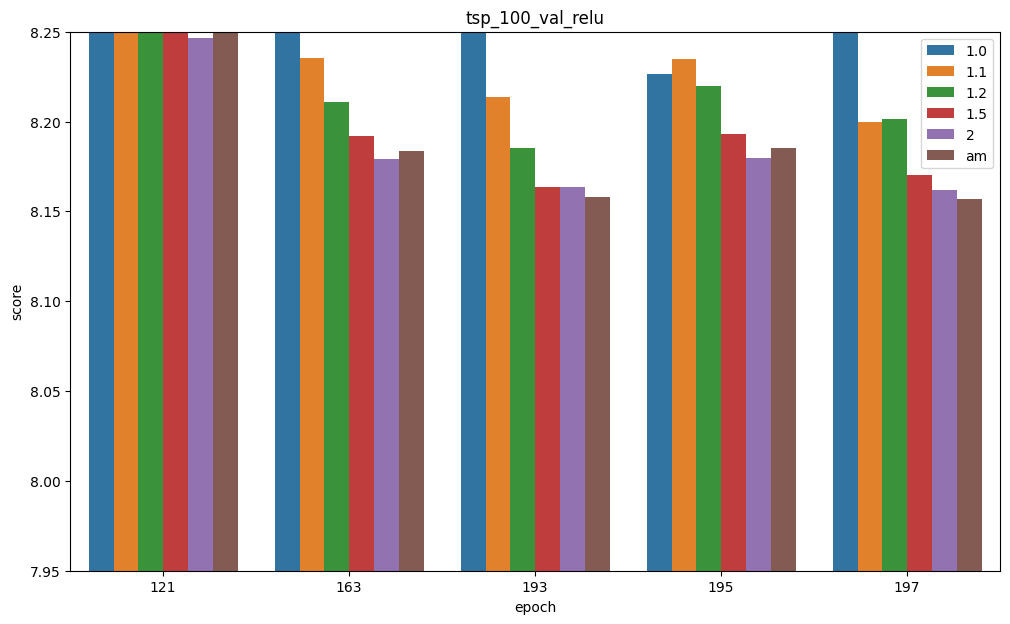

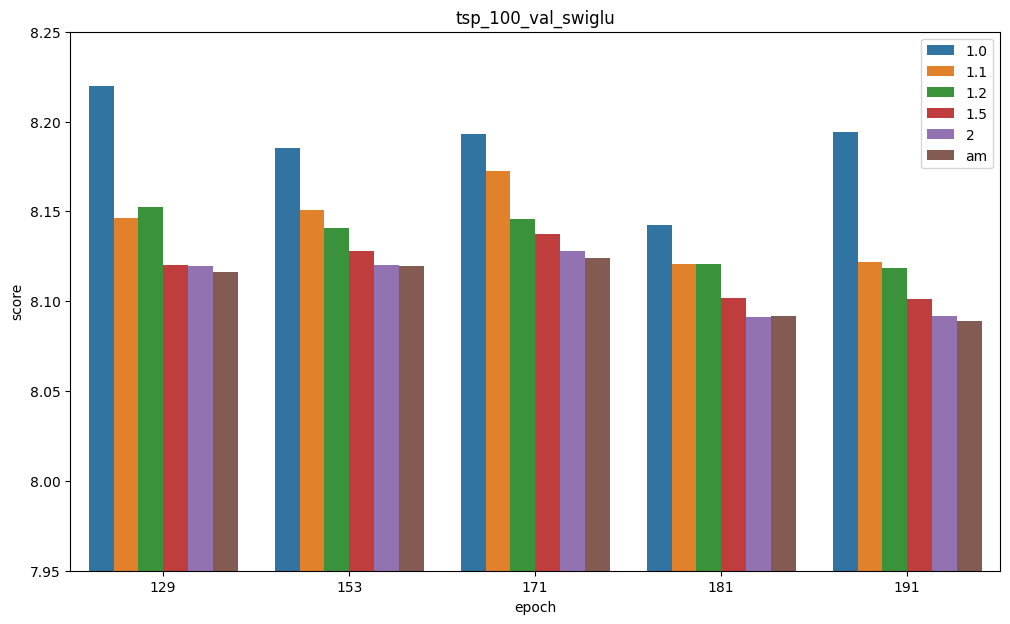

In [398]:
tsp_100 = pd.concat([get_parital_result('am', 'tsp', 100), get_parital_result('mcts', 'tsp', 100, leave_only_puct=True)])

for _baseline in ['mean', 'val']:
    for _activation in ['relu', 'swiglu']:
        plot_bar_result(tsp_100, _baseline, _activation, 'tsp', 100)